# MSIS 579 HW2 CNN to recognize Rock/Paper/Scissors

In this homework, we will train a convolution neural network to recognize gesture Rock/Paper/Scissors. 

## Load Rock/Paper/Scissors Dataset
First we download the data and put them into its own directories for model training and evaluation. There are two dataset in zip format. Download each and put them into the corresponding directories.

In [0]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2020-04-24 04:41:52--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M  64.9MB/s    in 2.9s    

2020-04-24 04:41:55 (64.9 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2020-04-24 04:41:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c00::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp/rps-test-set.zip’

/tmp/

In [0]:
%tensorflow_version 1.14
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

import os
import zipfile

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.14`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


After running the folloiwng code, you will have exactly 840 images for each gesture. 

In [0]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)))
print('total training paper images:', len(os.listdir(paper_dir)))
print('total training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])


total training rock images: 840
total training paper images: 840
total training scissors images: 840
['rock06ck02-118.png', 'rock04-111.png', 'rock05ck01-028.png', 'rock07-k03-114.png', 'rock02-052.png', 'rock02-056.png', 'rock06ck02-066.png', 'rock03-116.png', 'rock03-037.png', 'rock06ck02-064.png']
['paper01-061.png', 'paper01-005.png', 'paper05-108.png', 'paper02-005.png', 'paper07-033.png', 'paper04-118.png', 'paper03-105.png', 'paper06-014.png', 'paper07-096.png', 'paper06-018.png']
['testscissors03-027.png', 'testscissors03-049.png', 'scissors01-115.png', 'scissors04-039.png', 'testscissors03-026.png', 'testscissors03-090.png', 'scissors02-053.png', 'scissors03-055.png', 'testscissors03-038.png', 'testscissors03-033.png']


Now, let's plot 2 images from each class.  You wil find those images are taken from different views and images vary a lot even for the same gesture. 

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## TASK 0: Prepare all the images
Reformat the name of the images, copy and move them to corresponding directories

In [0]:
import shutil
import os
import re
import os
os.getcwd()


'/content'

In [0]:
os.listdir('/tmp')

['rps-test-set', 'rps.zip', 'rps-test-set.zip', 'rps']

In [0]:
for i, filename in enumerate(os.listdir('/tmp/rps/rock')):
    os.rename('/tmp/rps/rock/' + filename, '/tmp/rps/rock/' + 'rock' + str(i) + ".png")

In [0]:
for i, filename in enumerate(os.listdir('/tmp/rps/paper')):
      os.rename('/tmp/rps/paper/' + filename, '/tmp/rps/paper/' + 'paper' + str(i) + ".png")

In [0]:
for i, filename in enumerate(os.listdir('/tmp/rps/scissors')):
      os.rename('/tmp/rps/scissors/' + filename, '/tmp/rps/scissors/' + 'scissors' + str(i) + ".png")

In [0]:
files = os.listdir('/tmp/rps/rock/')
for f in files:
    shutil.move('/tmp/rps/rock/'+f, '/tmp/'+f)
    
files = os.listdir('/tmp/rps/paper/')
for f in files:
    shutil.move('/tmp/rps/paper/'+f, '/tmp/'+f)

files = os.listdir('/tmp/rps/scissors/')
for f in files:
    shutil.move('/tmp/rps/scissors/'+f, '/tmp/'+f)

In [0]:
os.listdir('/tmp')

In [0]:
# The path to the directory where the original dataset was uncompressed
original_dataset_dir = '/tmp'

# The directory where we will
# store our smaller dataset
base_dir = '/tmp/rps_split'
if os.path.exists(base_dir):
  shutil.rmtree(base_dir)
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# Directory with our training Rock pictures
train_rock_dir = os.path.join(train_dir, 'Rock')
os.mkdir(train_rock_dir)

# Directory with our training Paper pictures
train_paper_dir = os.path.join(train_dir, 'Paper')
os.mkdir(train_paper_dir)

# Directory with our training Scissors pictures
train_scissors_dir = os.path.join(train_dir, 'Scissors')
os.mkdir(train_scissors_dir)

# Directory with our validation rock pictures
validation_rock_dir = os.path.join(validation_dir, 'rock')
os.mkdir(validation_rock_dir)

# Directory with our validation paper pictures
validation_paper_dir = os.path.join(validation_dir, 'paper')
os.mkdir(validation_paper_dir)

# Directory with our validation scissors pictures
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
os.mkdir(validation_scissors_dir)


In [0]:
# Copy first 500 Rock images to train_rock_dir
fnames = ['rock{}.png'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_rock_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 500 Paper images to train_paper_dir
fnames = ['paper{}.png'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_paper_dir, fname)
    shutil.copyfile(src, dst)

# Copy first 500 Scissors images to train_scissors_dir
fnames = ['scissors{}.png'.format(i) for i in range(500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_scissors_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 340 rock images to validation_rock_dir
fnames = ['rock{}.png'.format(i) for i in range(500, 840)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_rock_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 340 paper images to validation_paper_dir
fnames = ['paper{}.png'.format(i) for i in range(500, 840)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_paper_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 340 scissors images to validation_scissors_dir
fnames = ['rock{}.png'.format(i) for i in range(500, 840)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_scissors_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
sorted(os.listdir('/tmp'))

In [0]:
print('total training rock images:', len(os.listdir(train_rock_dir)))
print('total training paper images:', len(os.listdir(train_paper_dir)))
print('total training scissors images:', len(os.listdir(train_scissors_dir)))

total training rock images: 500
total training paper images: 500
total training scissors images: 500


In [0]:
print('total validation rock images:', len(os.listdir(validation_rock_dir)))
print('total validation paper images:', len(os.listdir(validation_paper_dir)))
print('total validation scissors images:', len(os.listdir(validation_scissors_dir)))

total validation rock images: 340
total validation paper images: 340
total validation scissors images: 340


In [0]:
# Now we do the test data preprocess
for i, filename in enumerate(os.listdir('/tmp/rps-test-set/rock')):
    os.rename('/tmp/rps-test-set/rock/' + filename, '/tmp/rps-test-set/rock/' + 'testrock' + str(i) + ".png")

for i, filename in enumerate(os.listdir('/tmp/rps-test-set/paper')):
    os.rename('/tmp/rps-test-set/paper/' + filename, '/tmp/rps-test-set/paper/' + 'testpaper' + str(i) + ".png")

for i, filename in enumerate(os.listdir('/tmp/rps-test-set/scissors')):
    os.rename('/tmp/rps-test-set/scissors/' + filename, '/tmp/rps-test-set/scissors/' + 'testscissors' + str(i) + ".png")


In [0]:
files = os.listdir('/tmp/rps-test-set/rock/')
for f in files:
    shutil.move('/tmp/rps-test-set/rock/'+f, '/tmp/'+f)
    
files = os.listdir('/tmp/rps-test-set/paper/')
for f in files:
    shutil.move('/tmp/rps-test-set/paper/'+f, '/tmp/'+f)

files = os.listdir('/tmp/rps-test-set/scissors/')
for f in files:
    shutil.move('/tmp/rps-test-set/scissors/'+f, '/tmp/'+f)

In [0]:
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our test rock pictures
test_rock_dir = os.path.join(test_dir, 'rock')
os.mkdir(test_rock_dir)

# Directory with our test paper pictures
test_paper_dir = os.path.join(test_dir, 'paper')
os.mkdir(test_paper_dir)

# Directory with our test scissors pictures
test_scissors_dir = os.path.join(test_dir, 'scissors')
os.mkdir(test_scissors_dir)

In [0]:
# Copy 124 rock images to test_rock_dir
fnames = ['testrock{}.png'.format(i) for i in range(124)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_rock_dir, fname)
    shutil.copyfile(src, dst)

# Copy 124 paper images to test_paper_dir
fnames = ['testpaper{}.png'.format(i) for i in range(124)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_paper_dir, fname)
    shutil.copyfile(src, dst)

# Copy 124 scissors images to test_scissors_dir
fnames = ['testscissors{}.png'.format(i) for i in range(124)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_scissors_dir, fname)
    shutil.copyfile(src, dst)

In [0]:
print('total test paper images:', len(os.listdir(test_rock_dir)))
print('total test paper images:', len(os.listdir(test_paper_dir)))
print('total test scissors images:', len(os.listdir(test_scissors_dir)))

total test paper images: 124
total test paper images: 124
total test scissors images: 124


In [0]:
# TODO

from keras.preprocessing.image import ImageDataGenerator

classes = ['rock', 'paper', 'scissors']

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=20,
        lass_mode='categorical'
)

Found 1500 images belonging to 3 classes.
Found 1020 images belonging to 3 classes.


In [0]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20, 3)


## TASK 1: Build a fully connect Neural Network
First, let's try what we've learned from the previous lecture. We will build a FULLY connect neural networks to classify the gesture images.You are free to experiment with different structure of the network, data augmentation, dropout, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.  Watch out for overfitting.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [0]:
# TODO
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(150, 150, 3)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 150, 150, 64)      256       
_________________________________________________________________
dense_6 (Dense)              (None, 150, 150, 64)      4160      
_________________________________________________________________
dense_7 (Dense)              (None, 150, 150, 64)      4160      
_________________________________________________________________
flatten_2 (Flatten)          (None, 1440000)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1440000)           0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 4320003   
Total params: 4,328,579
Trainable params: 4,328,579
Non-trainable params: 0
____________________________________________

In [0]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=40,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/20
100/100 [==============================] - 23s 230ms/step - loss: 4.6639 - acc: 0.3590 - val_loss: 1.0700 - val_acc: 0.4240
Epoch 2/20
100/100 [==============================] - 21s 209ms/step - loss: 1.2180 - acc: 0.4225 - val_loss: 1.6928 - val_acc: 0.4280
Epoch 3/20
100/100 [==============================] - 21s 208ms/step - loss: 1.1531 - acc: 0.4400 - val_loss: 1.2580 - val_acc: 0.4420
Epoch 4/20
100/100 [==============================] - 21s 207ms/step - loss: 1.1424 - acc: 0.4715 - val_loss: 0.9102 - val_acc: 0.4700
Epoch 5/20
100/100 [==============================] - 21s 207ms/step - loss: 1.0857 - acc: 0.4755 - val_loss: 1.0943 - val_acc: 0.4090
Epoch 6/20
100/100 [==============================] - 21s 206ms/step - loss: 1.0399 - acc: 0.5045 - val_loss: 1.3160 - val_acc: 0.4760
Epoch 7/20
100/100 [==============================] - 21s 207ms/step - loss: 1.0651 - acc: 0.4985 - val_loss: 1.4626 - val_acc: 0.4340
Epoch 8/20
100/100 [==============================] - 2

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.evaluate_generator(test_generator)

## TASK 2: Build Convolution Neural Network
Now, let's try a convolution neural network (CNN) and see if we can achieve better performance. Similarly you are free to experiment with different structure of the network, techniques to avoid overfitting, different optimizer, and etc, to try to achieve the best performance on the TEST data in terms of accuracy.

Note that you should set test aside when you train your model. In the end, please report your model accuracy on the test set. 

In [0]:
cnnmodel = models.Sequential()
cnnmodel.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnnmodel.add(layers.MaxPooling2D((2, 2)))
cnnmodel.add(layers.Flatten())
cnnmodel.add(layers.Dropout(0.5))
cnnmodel.add(layers.Dense(512, activation='relu'))
cnnmodel.add(layers.Dense(3, activation='softmax'))

In [0]:
cnnmodel.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)      

In [0]:
cnnmodel.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=0.001),
              metrics=['acc'])

In [0]:
history = cnnmodel.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 24s 240ms/step - loss: 1.2042 - acc: 0.3685 - val_loss: 0.8204 - val_acc: 0.5720
Epoch 2/30
100/100 [==============================] - 19s 194ms/step - loss: 0.7804 - acc: 0.6490 - val_loss: 1.7398 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 20s 198ms/step - loss: 0.5413 - acc: 0.7670 - val_loss: 1.2282 - val_acc: 0.6050
Epoch 4/30
100/100 [==============================] - 19s 193ms/step - loss: 0.3541 - acc: 0.8580 - val_loss: 4.5388 - val_acc: 0.6250
Epoch 5/30
100/100 [==============================] - 19s 192ms/step - loss: 0.2758 - acc: 0.9000 - val_loss: 1.7766 - val_acc: 0.5540
Epoch 6/30
100/100 [==============================] - 19s 193ms/step - loss: 0.2006 - acc: 0.9305 - val_loss: 2.1899 - val_acc: 0.6680
Epoch 7/30
100/100 [==============================] - 19s 192ms/step - loss: 0.2155 - acc: 0.9270 - val_loss: 7.1327 - val_acc: 0.6640
Epoch 8/30
100/100 [==============================] - 1

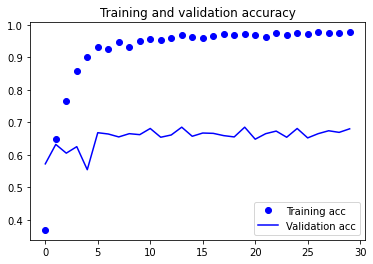

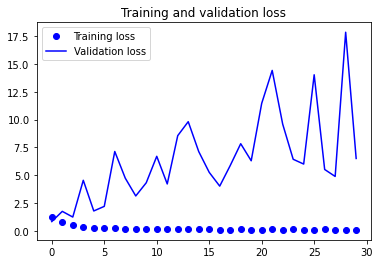

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
cnnmodel.evaluate_generator(test_generator)

## Use the best model to classify gestures
You can now run the following code and use the model you trained to classify images uploaded from your laptop. Let us know how your model performs on the new unseen images.  

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = cnnmodel.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving testpaper02-10.png to testpaper02-10.png
testpaper02-10.png
[[1. 0. 0.]]
